## Import modules


In [1]:
from data_access.firebase_fhir_data_access import *
from data_flattening.fhir_resources_flattener import *
from data_processing.data_processor import *
from data_visualization.data_visualizer import *
from data_export.data_exporter import *

## Define credential files

In [10]:
# Define your Firebase project ID
project_id = "cs342-2024-example-application" 

# Define the service account key file
service_account_key_file = "cs342-2024-example-application-firebase-adminsdk-z4ske-800739b1af.json"

# Define the collection name where your FHIR observations are stored and the input code if filtering is needed
collection_name = "users"
subcollection_name = "HealthKit"
loinc_codes = ["131328"] #,"9052-2","8867-4", "131328"]

## Initialize the FirebaseFHIRAccess class using your Firebase credentials

In [ ]:
firebase_access = FirebaseFHIRAccess(project_id, service_account_key_file)
firebase_access.connect()

# Fetch FHIR observations from Firestore
fhir_observations = firebase_access.fetch_data(collection_name, subcollection_name, loinc_codes)

# # Flatten the fetched FHIR observations into a FHIRDataFrame
flattened_fhir_dataframe = flatten_fhir_resources(fhir_observations)
flattened_fhir_dataframe.df.head()

## Apply basic processing for convenient data readability

In [7]:
processed_fhir_dataframe = FHIRDataProcessor().process_fhir_data(flattened_fhir_dataframe)
processed_fhir_dataframe.df.head()

,UserId,EffectiveDateTime,LoincCode,QuantityValue,AppleHealthKitCode,QuantityUnit,QuantityName,Display
0,3EUoHxIuYkWMKcnLfK38nTGOqHn1,2024-04-01,55423-8,5745.0,HKQuantityTypeIdentifierStepCount,steps,Total daily Step Count,Number of steps in unspecified time Pedometer
1,3EUoHxIuYkWMKcnLfK38nTGOqHn1,2024-04-02,55423-8,8800.0,HKQuantityTypeIdentifierStepCount,steps,Total daily Step Count,Number of steps in unspecified time Pedometer
2,7uMKVmPZdwgtb9hc6r9YZyYXnwc2,2024-02-22,55423-8,29779.0,HKQuantityTypeIdentifierStepCount,steps,Total daily Step Count,Number of steps in unspecified time Pedometer
3,7uMKVmPZdwgtb9hc6r9YZyYXnwc2,2024-02-23,55423-8,28772.0,HKQuantityTypeIdentifierStepCount,steps,Total daily Step Count,Number of steps in unspecified time Pedometer
4,7uMKVmPZdwgtb9hc6r9YZyYXnwc2,2024-02-25,55423-8,26495.0,HKQuantityTypeIdentifierStepCount,steps,Total daily Step Count,Number of steps in unspecified time Pedometer


## Visualize Data

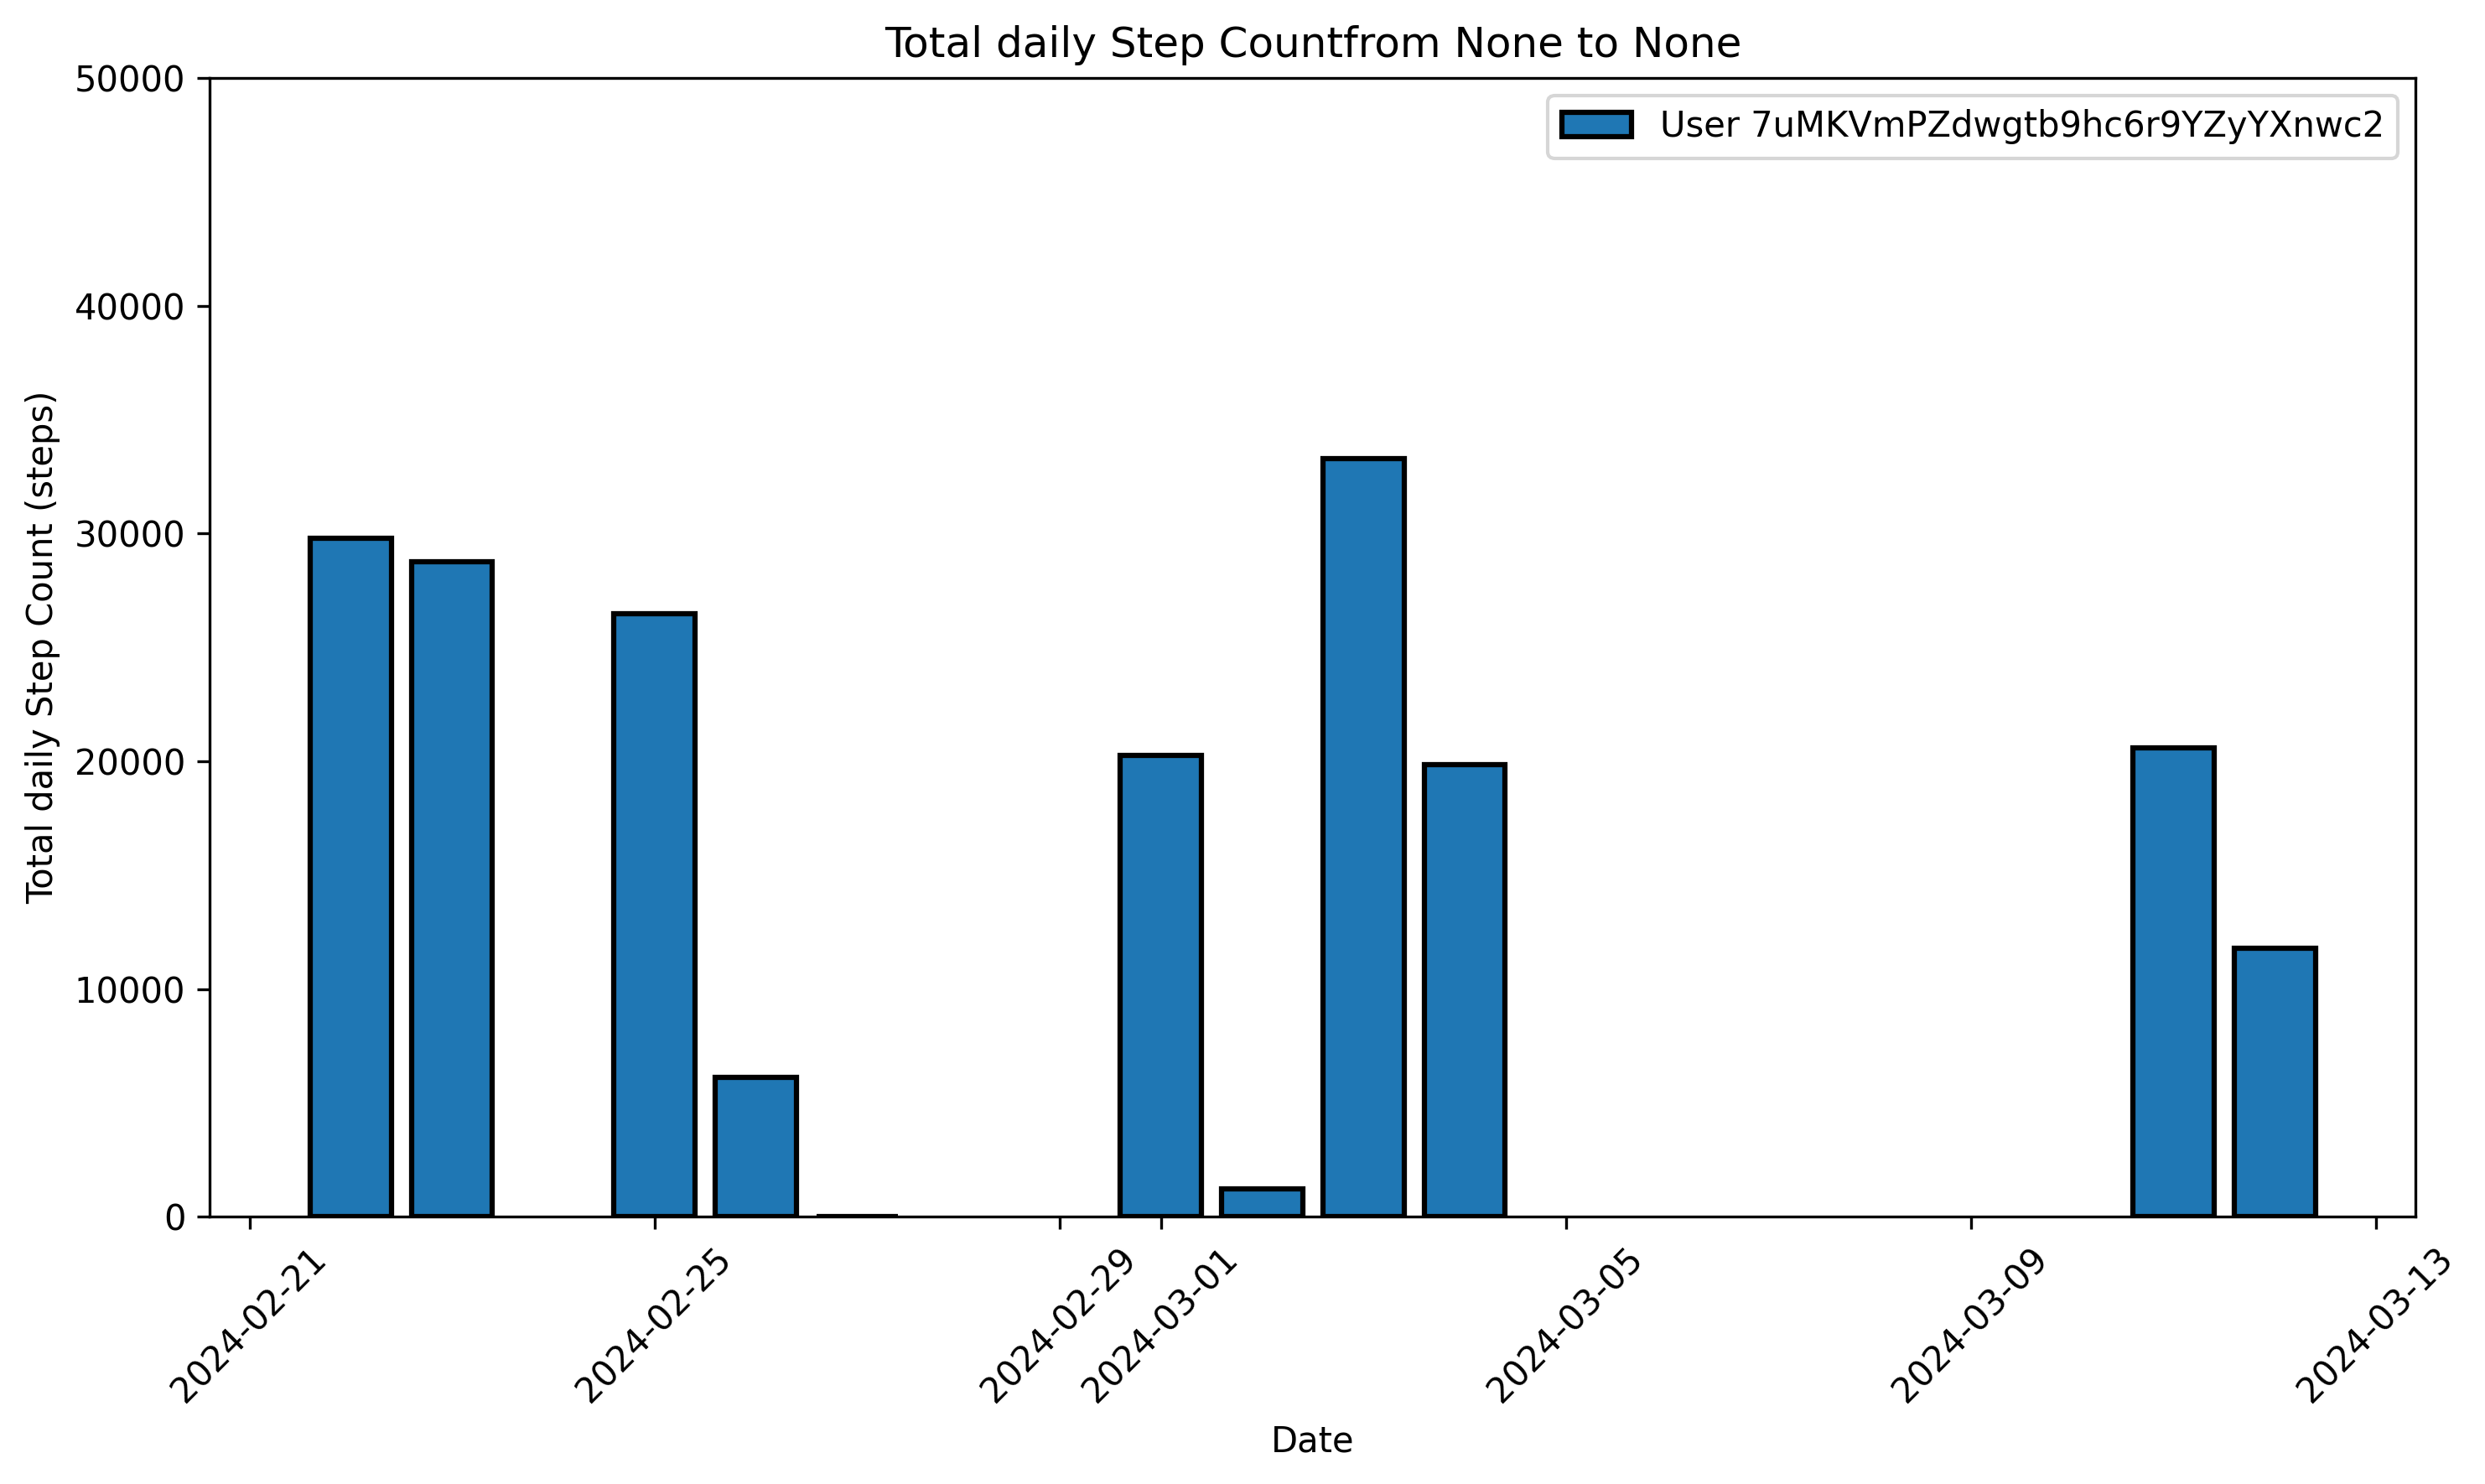

In [5]:
visualizer = DataVisualizer()
# selected_users = ["5okimXt6noCIcD4DGoB13wzXVJjY", "ys7YzmWeX0tKr1ilsXMiNaiZxGTk"]  # Use None to plot data for all users
visualizer.set_user_ids(["7uMKVmPZdwgtb9hc6r9YZyYXnwc2"])
# visualizer.set_date_range("2024-01-01", "2023-03-31")
visualizer.set_y_bounds(0, 50000)

fig = visualizer.create_static_plot(processed_fhir_dataframe)

## Export data

In [ ]:
exporter = DataExporter(processed_fhir_dataframe)
# selected_users = ["sEmijWpn0vXe1cj60GO5kkjkrdT4"] 
# exporter.set_user_ids(selected_users)
# exporter.set_date_range("2022-01-01", "2022-12-31")
# exporter.set_y_bounds(50, 700)
exporter.create_and_save_plot("data_plot.tif")